
# Project: FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project, I have chosen the data from the FBI's National Instant Criminal Background Check System (NICS) and the U.S Census Data. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. The statistics in this dataset originally represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. HOWEVER, ACCORDING TO "The Trace (2015), THE FBI'S NICS NUMBERS ARE WIDELY ACCEPTED AS THE BEST PROXY FOR TOTAL GUN SALES IN A GIVEN TIME PERIOD. All analysis that will be carried out with this dataset will be considered related to Gun Sales.

>The U.S Census Data is also to provide demographic data about the U.S States. Statistics from this dataset will be referenced in this project for more insight.

>I aim to answer four (4) questions as I Investigate this dataset.
>1. What is the trend of Gun Sales across the U.S States?
>2. Can the Per Capita Income of a State reveal how guns are Purchased?
>3. Are the number of veterans in a State indicative of guns in the state?
>4. What is the Race distribution of the State with the highest number of Guns

In [1]:
# Importing all packages to be used in the project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the project, the datasets will be loaded. The structure will be noted and inspected for the need for any cleaning.

### General Properties

> **FBI Gun Data will be read into a dataframe(df_gun) and U.S Census Data will be read into another dataframe(df_census). The first 5 data entries in each dataframe is displayed to have an idea of the structure.**

In [2]:
df_gun = pd.read_excel('gun_data.xlsx')
df_census = pd.read_csv('U.S. Census Data.csv')

In [3]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


>**The total number of rows and columns is revealed for both dataframes with the .shape() method and the .info() is also used to inspect for the datatypes, the columns and any missing values. By doing these, I start to identify which rows and columns will be necessary.**

In [5]:
# Finding out the total rows and columns in the gun_data dataset
df_gun.shape

(12485, 27)

In [6]:
# Finding out the total rows and columns in the U.S Census Data dataset
df_census.shape

(85, 52)

In [7]:
# Dataset information for gun_data
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [8]:
# Dataset information for census data
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

>**df_gun has 12485 rows made up of each month from September 2017 to November 1998. The 27 columns have data on the kind of guns or permits called in for check.**
>**df_census has 85 rows of varied demographic into and 52 columns of the States. Most of the datatypes are string which is quite strange for a census data. This will be explore more.**

> As mentioned in the introduction, the statistics in the FBI's NICS represent the number of firearm background checks intiated and not necessarily the firearms sold BUT these numbers have been widely accepted as the best proxy for total gun sales in a given period.
> When the New York Times analyzed NICS data in Dec. 2015, it included this methodology note:
> Sales estimates are calculated from handgun, long gun and multiple-gun background checks. Permit checks and other categories of background checks are excluded.

> For this project, the Sales estimates will be calculated from handgun, long gun and other since these three (3) columns give of all types of firearm. The multiple-gun will be excluded since it is just indicative of checks involving more than one fire arm. The other categories(columns) will also be excluded.

### Data Cleaning (FBI Gun Data - df_gun)

In [9]:
# Creating a list of columns which will not be needed and dropping them.

non_essential_columns = ['permit', 'permit_recheck','admin','prepawn_handgun','prepawn_long_gun',
                        'prepawn_other','redemption_handgun','redemption_long_gun','redemption_other',
                        'returned_handgun','returned_long_gun','returned_other','rentals_handgun',
                        'rentals_long_gun','private_sale_handgun','private_sale_long_gun',
                        'private_sale_other','return_to_seller_handgun','return_to_seller_long_gun',
                         'return_to_seller_other']
df_gun.drop(non_essential_columns, axis=1, inplace=True)

In [10]:
# Confirm the columns in the list above have been dropped.
df_gun.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,5734.0,6320.0,221.0,317,32019
1,2017-09,Alaska,2320.0,2930.0,219.0,160,6303
2,2017-09,Arizona,11063.0,7946.0,920.0,631,28394
3,2017-09,Arkansas,4347.0,6063.0,165.0,366,17747
4,2017-09,California,37165.0,24581.0,2984.0,0,123506


In [11]:
# Since most of the data in the U.S Census Data is referenced to the year 2016,
# This dataset will also be limited to the year 2016 for more accurate analysis
# All rows of data for years other than 2016 will be dropped

df_gun.drop(df_gun.index[df_gun['month'].str.contains("2016")==False], inplace=True)

In [12]:
#Confirm the rows have been dropped.
df_gun.head()

,month,state,handgun,long_gun,other,multiple,totals
495,2016-12,Alabama,13733.0,17519.0,376.0,533,62014
496,2016-12,Alaska,4087.0,3698.0,243.0,191,8786
497,2016-12,Arizona,18024.0,13785.0,1180.0,703,44887
498,2016-12,Arkansas,9192.0,13433.0,277.0,385,29926
499,2016-12,California,63649.0,93224.0,77929.0,0,298161


In [13]:
# To have one row of data for each State, the dataset is grouped by state and all values for each
# state is summed up 

df_gun = df_gun.groupby(['state'], as_index=False).sum()

C:\Users\Derrick\AppData\Local\Temp\ipykernel_2464\264884045.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gun = df_gun.groupby(['state'], as_index=False).sum()


In [14]:
# Confirming the sum of values have been made according to the states
df_gun.head()

,state,handgun,long_gun,other,multiple,totals
0,Alabama,153123.0,121963.0,6104.0,6545,616947
1,Alaska,37491.0,36887.0,2889.0,2316,87647
2,Arizona,166784.0,108988.0,13122.0,7908,416279
3,Arkansas,80244.0,82120.0,3059.0,4400,266014
4,California,560355.0,554550.0,211707.0,0,2377167


In [15]:
# Checking number of rows to give an idea of the number of states.
df_gun.shape

(55, 6)

In [16]:
# The rows are 55, which is more than the known 50 Federal Republic States.
# Checking for any duplicated States
df_gun.duplicated().sum()

0

>**The df_gun has been reduced to 6 columns (state, handgun, long_gun, other, multiple, totals). No data entry has been changed yet. The expected number of rows was 51 to correspond with the 50 Federeal States of the USA but it has turned out to be more. Probably some territories have been added. This will be dropped later after cleaning df_census.**

> As Seen in the display of general properties, the US Census Data has information about each state as well with about 80 different fields. To answer the questions set at the beginning of the project, some rows will be dropped. Only rows relevant to the projects research questions will be kept.

>Also, in this dataset, the states appear as the columns rather. This will be transposed to fit the same structure as the df_gun(states are the rows) for easier merging of the two datasets

>The new column names will be changed as they are too long and will make subsequent codes more difficult. Each column name will be changed to lowercase and underscores used to seperate multiple words.

### Data Cleaning (US Census Data - df_census)

In [17]:
# Rows that will be essential in answering the research questions = [0, 12, 13, 14, 15, 16, 20, 48]
# Extracting these rows out of the lot
df_census = df_census.loc[[0, 12, 13, 14, 15, 16, 20, 48],:]

In [18]:
# Confirming the essential rows have been extracted
df_census

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
12,"White alone, percent, July 1, 2016, (V2016)",(a),69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",(a),26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",(a),0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",(a),1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,(a),0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,Z,0.10%,0.80%,Z,0.10%,0.10%
20,"Veterans, 2011-2015",NaN,"363,170","69,323","505,794","220,953","1,777,410","391,725","199,331","71,213",...,63742,462414,"1,539,655","134,332","44,708","706,539","564,864","150,021","381,940","48,505"
48,Per capita income in past 12 months (in 2015 d...,NaN,"$24,091","$33,413","$25,848","$22,798","$30,318","$32,217","$38,803","$30,554",...,26747,25227,"$26,999","$24,686","$29,894","$34,152","$31,762","$23,450","$28,340","$29,803"


In [19]:
# This column was added to provided extra information on the rows
# Dropping the 'Fact Note' column
df_census.drop('Fact Note', axis=1, level=None, inplace=True)

In [20]:
# Setting Fact Column as Index
df_census = df_census.set_index('Fact')

In [21]:
# Transposing the dataset to have the same the states as rows rather than columns
# Similar to df_gun dataset.
df_census = df_census.transpose()

In [22]:
# Reseting indexes
df_census.reset_index(inplace=True)

In [23]:
# Confirming the drop,transpose and index reset
df_census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015"
0,Alabama,"4,863,300",69.30%,26.80%,0.70%,1.40%,0.10%,"363,170","$24,091"
1,Alaska,"741,894",66.10%,3.80%,15.20%,6.30%,1.30%,"69,323","$33,413"
2,Arizona,"6,931,071",83.30%,4.90%,5.40%,3.40%,0.30%,"505,794","$25,848"
3,Arkansas,"2,988,248",79.40%,15.70%,1.00%,1.60%,0.30%,"220,953","$22,798"
4,California,"39,250,017",72.70%,6.50%,1.70%,14.80%,0.50%,"1,777,410","$30,318"


In [24]:
# Assigning the state label to have the same label in df_gun
df_census = df_census.rename(columns = {'index':'state'})

In [25]:
df_census.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015"
0,Alabama,"4,863,300",69.30%,26.80%,0.70%,1.40%,0.10%,"363,170","$24,091"
1,Alaska,"741,894",66.10%,3.80%,15.20%,6.30%,1.30%,"69,323","$33,413"
2,Arizona,"6,931,071",83.30%,4.90%,5.40%,3.40%,0.30%,"505,794","$25,848"
3,Arkansas,"2,988,248",79.40%,15.70%,1.00%,1.60%,0.30%,"220,953","$22,798"
4,California,"39,250,017",72.70%,6.50%,1.70%,14.80%,0.50%,"1,777,410","$30,318"


>**The essential rows in df_census have been extracted, 'Fact Note' Column dropped and the dataset transposed so we have the same structure with df_gun. The states are now common with df_gun.**

> Now that both df_gun and df_census are similar in structure, they will be merged to form a new dataframe df_merged

>The column names of df_merged will be simplified to lower_case and the datatypes changed to help in analysis. As mentioned earlier, most of the datatypes from the US Census Data were string. They are better as int and floats for computations sake.

>One Column has "Z" in the entries, according to the Fact Notes of the original US Census dataset, this Z signified value greater than zero but less than half unit of measure. The other entries in that column are very small and so this "Z" in reality is almost 0. 

### Data Cleaning (New Dataframe Consisting of both df_gun & df_census)

In [26]:
# Merging of df_gun and df_census on the state column.
# Inner Join is used so df_merged will have only states common to both df_gun & df_census

df_merged=df_gun.merge(df_census, left_on='state', right_on='state', how='inner')

In [27]:
# Renaming of column headers to make them easy to call 
df_merged.rename(columns = {'Population estimates, July 1, 2016,  (V2016)':'population_estimates',
                 'White alone, percent, July 1, 2016,  (V2016)':'white',
                'Black or African American alone, percent, July 1, 2016,  (V2016)':'black_or_african_american',
                'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)':'native_american',
                'Asian alone, percent, July 1, 2016,  (V2016)':'asian',
                 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)':
                 'hawaiian_or_islanders','Veterans, 2011-2015':'veterans_11_15',
                 'Per capita income in past 12 months (in 2015 dollars), 2011-2015':'per_capita_income_11_15'},
                inplace=True)
df_merged.head(0)

,state,handgun,long_gun,other,multiple,totals,population_estimates,white,black_or_african_american,native_american,asian,hawaiian_or_islanders,veterans_11_15,per_capita_income_11_15


In [28]:
# Confirming the merging and renaming of columns has worked.
df_merged.head()

,state,handgun,long_gun,other,multiple,totals,population_estimates,white,black_or_african_american,native_american,asian,hawaiian_or_islanders,veterans_11_15,per_capita_income_11_15
0,Alabama,153123.0,121963.0,6104.0,6545,616947,"4,863,300",69.30%,26.80%,0.70%,1.40%,0.10%,"363,170","$24,091"
1,Alaska,37491.0,36887.0,2889.0,2316,87647,"741,894",66.10%,3.80%,15.20%,6.30%,1.30%,"69,323","$33,413"
2,Arizona,166784.0,108988.0,13122.0,7908,416279,"6,931,071",83.30%,4.90%,5.40%,3.40%,0.30%,"505,794","$25,848"
3,Arkansas,80244.0,82120.0,3059.0,4400,266014,"2,988,248",79.40%,15.70%,1.00%,1.60%,0.30%,"220,953","$22,798"
4,California,560355.0,554550.0,211707.0,0,2377167,"39,250,017",72.70%,6.50%,1.70%,14.80%,0.50%,"1,777,410","$30,318"


In [29]:
#Checking the properties of df_merged
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      50 non-null     object 
 1   handgun                    50 non-null     float64
 2   long_gun                   50 non-null     float64
 3   other                      50 non-null     float64
 4   multiple                   50 non-null     int64  
 5   totals                     50 non-null     int64  
 6   population_estimates       50 non-null     object 
 7   white                      50 non-null     object 
 8   black_or_african_american  50 non-null     object 
 9   native_american            50 non-null     object 
 10  asian                      50 non-null     object 
 11  hawaiian_or_islanders      50 non-null     object 
 12  veterans_11_15             50 non-null     object 
 13  per_capita_income_11_15    50 non-null     object 
d

In [30]:
# The following columns (handgun,long_gun and other) represent a count of the various types of gun
# and so the datatype will be changed to int
# Changing the datatype to int
df_merged = df_merged.astype({'handgun':'int64','long_gun':'int64','other':'int64'})

In [31]:
# The following are stored as object but need to be changed to float as they represent percentages
# Changing the datatypes to float.

df_merged['white'] = df_merged['white'].str.rstrip("%").astype(float).round(2);
df_merged['black_or_african_american'] = df_merged['black_or_african_american'].str.rstrip("%").astype(float).round(2);
df_merged['native_american'] = df_merged['native_american'].str.rstrip("%").astype(float).round(2);
df_merged['asian'] = df_merged['asian'].str.rstrip("%").astype(float).round(2);

In [32]:
# The following are stored as object but need to be changed to int as dey represent counts
# Changing to datatypes to int

df_merged['veterans_11_15'] = df_merged['veterans_11_15'].str.replace(',','').astype(int);
df_merged['population_estimates'] = df_merged['population_estimates'].str.replace(',','').astype(int);

In [33]:
# The per_capita_income_11_15 is a currency value and needs to be changed to float for computations.
# Stripping the extra characters and changing datatype to float

df_merged['per_capita_income_11_15'] = df_merged['per_capita_income_11_15'].str.strip();
df_merged['per_capita_income_11_15'] = df_merged['per_capita_income_11_15'].str.strip("$");
df_merged['per_capita_income_11_15'] = df_merged['per_capita_income_11_15'].str.replace(',','').astype(float);

In [34]:
# Identifying the index of all data entries with "Z"
df_merged.index[df_merged['hawaiian_or_islanders'] =='Z'].tolist()

[18, 21, 44, 47]

In [35]:
# Replacing all 'Z' with 0 as explained in the previous Markdown.
# Changing the datatype to float

df_merged.at[18,'hawaiian_or_islanders']=0
df_merged.at[21,'hawaiian_or_islanders']=0
df_merged.at[44,'hawaiian_or_islanders']=0
df_merged.at[47,'hawaiian_or_islanders']=0
df_merged['hawaiian_or_islanders'] = df_merged['hawaiian_or_islanders'].str.strip("%").astype(float);

In [36]:
# Ooops, Almost forgot the totals column has to be computed right.
# The totals column will be the sum of handgun, long_gun and others. This is the total firearm

df_merged['totals'] = df_merged.iloc[:,1:3].sum(axis=1)

>**The new dataframe df_merged has been cleaned and is read to be analysed and the research questions answered.**

<a id='eda'></a>
## Exploratory Data Analysis

>Here we go with the visualizations and answers to the research questions !!

### Research Question 1
### (What is the Trend of Gun Sales across the U.S States?)

In [37]:
#handgun,long_gun & others
#ax=df_merged.plot(x='state', y='handgun', kind='bar', title='Number of Checks by State', figsize=(16,10))
#df_merged.plot(x='state', y='long_gun', kind='bar', ax=ax, title='Number of Checks by State', figsize=(16,10), color='red')
#df_merged.plot(x='state', y='other', kind='bar', ax=ax, title='Number of Checks by State', figsize=(16,10), color='green')

#plt.xlabel('States')
#plt.ylabel('Number of Checks')

>**This question requires we see each states gun sales.**

>**We plot a bar graph of 'totals' against the 'state'.**

<Axes: title={'center': 'Gun Sales'}, xlabel='state'>

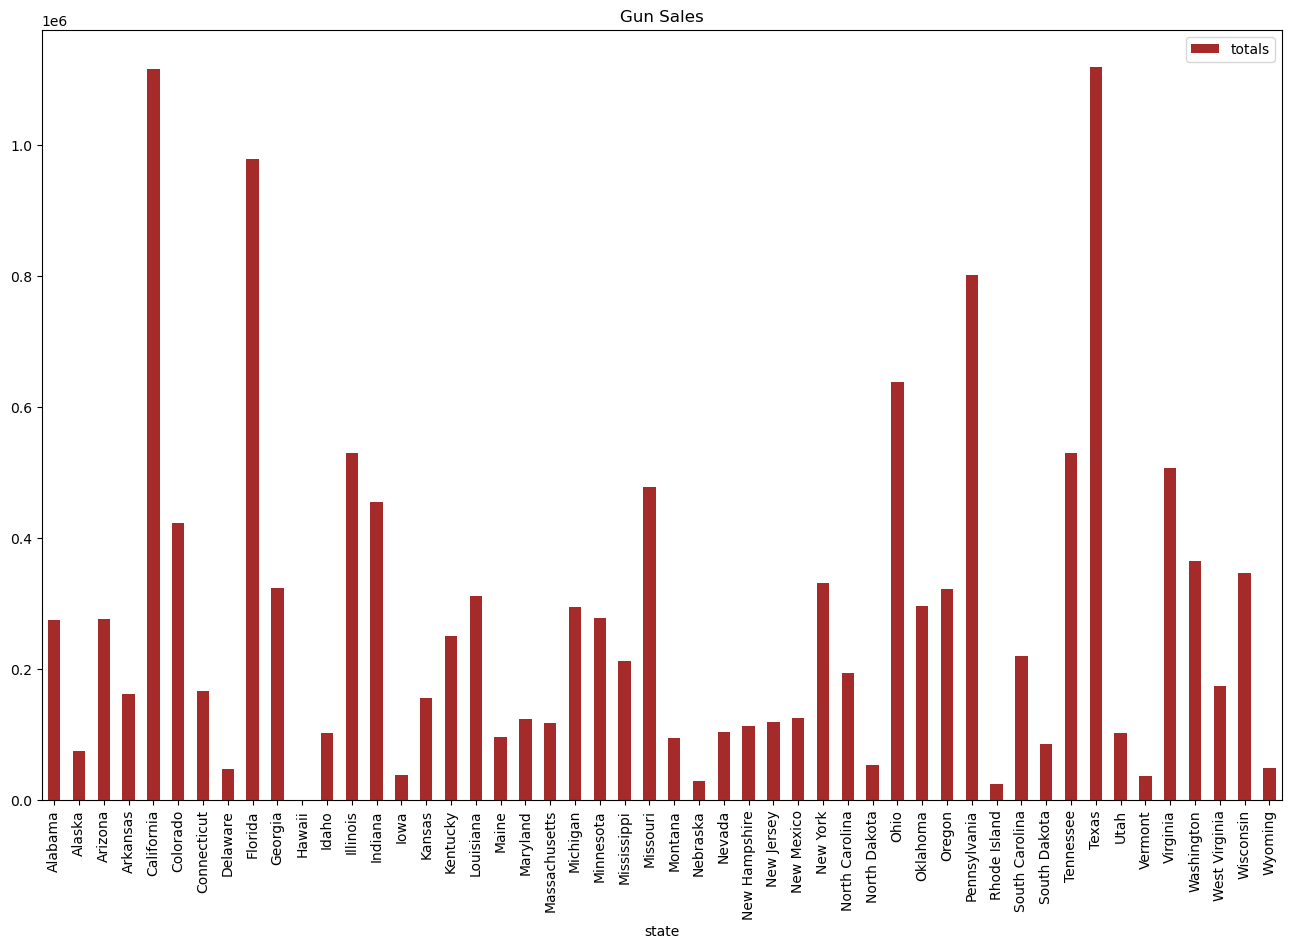

In [38]:
#Plotting a bar graph of US States and Total Gun Sales
df_merged.plot(x='state', y='totals', kind='bar', title='Gun Sales', figsize=(16,10), color='brown')

>Interesting things to note about this plot.

>1. Hawaii has no Gun Sales. (No calls to check the NICS)

>2. Texas and California States competing for the highest Gun Sales.

> The above plot shows the Total Gun Sales of the US States. However, the States are not of the same size in terms of population. The next plot is just to show the trend of Gun Sales with respect to the number of people in the State. 

<Axes: title={'center': 'Guns Per Population'}, xlabel='state'>

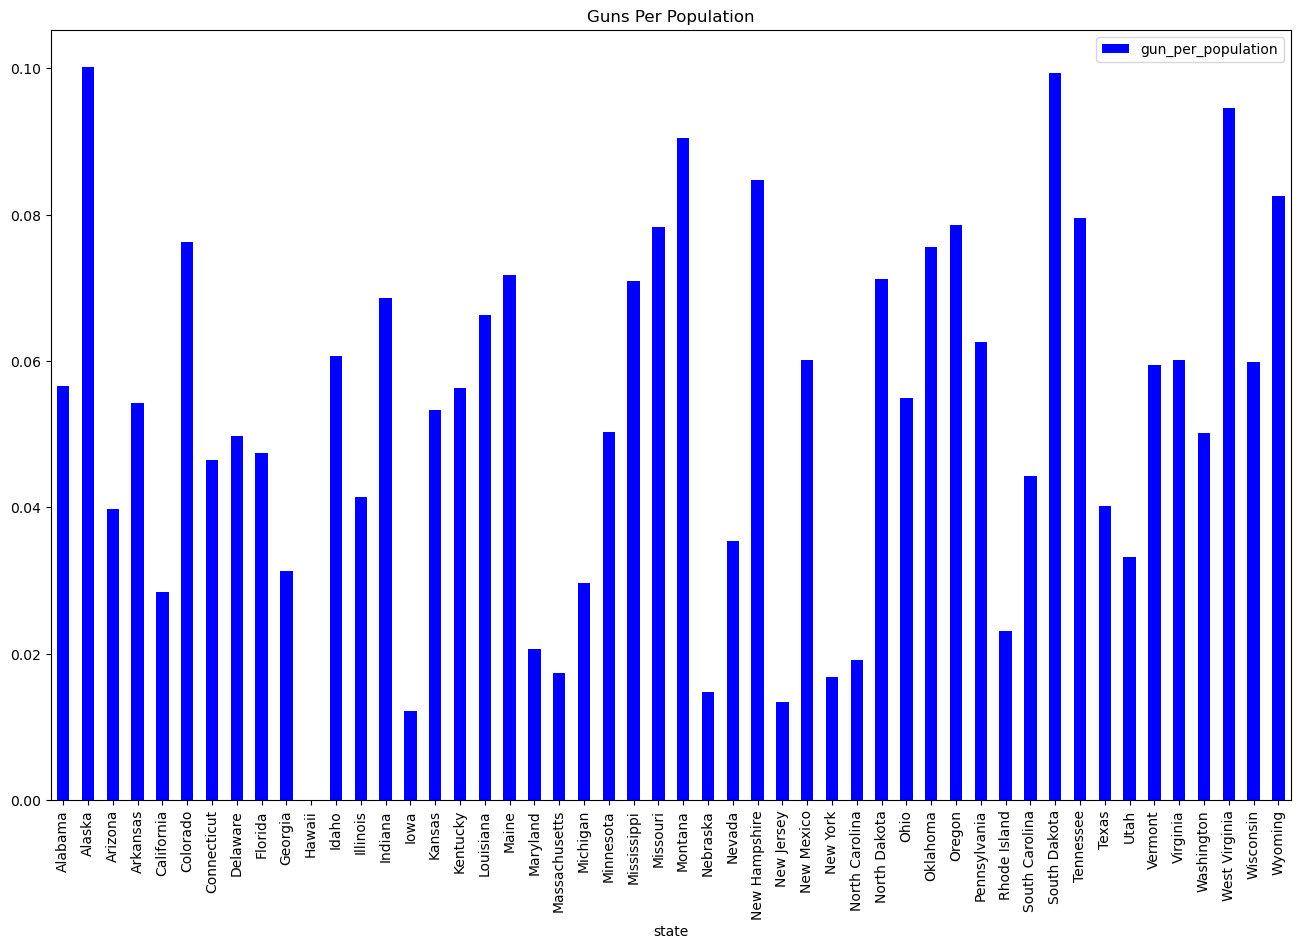

In [39]:
# This computation is to show the Gun Sales with respect to the Population of each state
# It represents the proportion of the population who have contributed to the gun sales

df_merged['gun_per_population'] = df_merged['totals']/df_merged['population_estimates']
df_merged.plot(x='state', y='gun_per_population', kind='bar', title='Guns Per Population', figsize=(16,10), color='blue')

> The graph changes once we consider the population. 10% of people in Alaska have contributed to the Gun Sales whereas 4% of people in Texas have done same.

### Research Question 2  
### (Can the Per Capita Income of a State reveal how Guns are Purchased ?)

>**Since guns arent cheap, it is easy to assume a certain economic state will have to be attained before they can be bought. This question requires we find a way to plot the per capita income and total gun sales to be able to make an inference**

<Axes: xlabel='per_capita_income_11_15', ylabel='totals'>

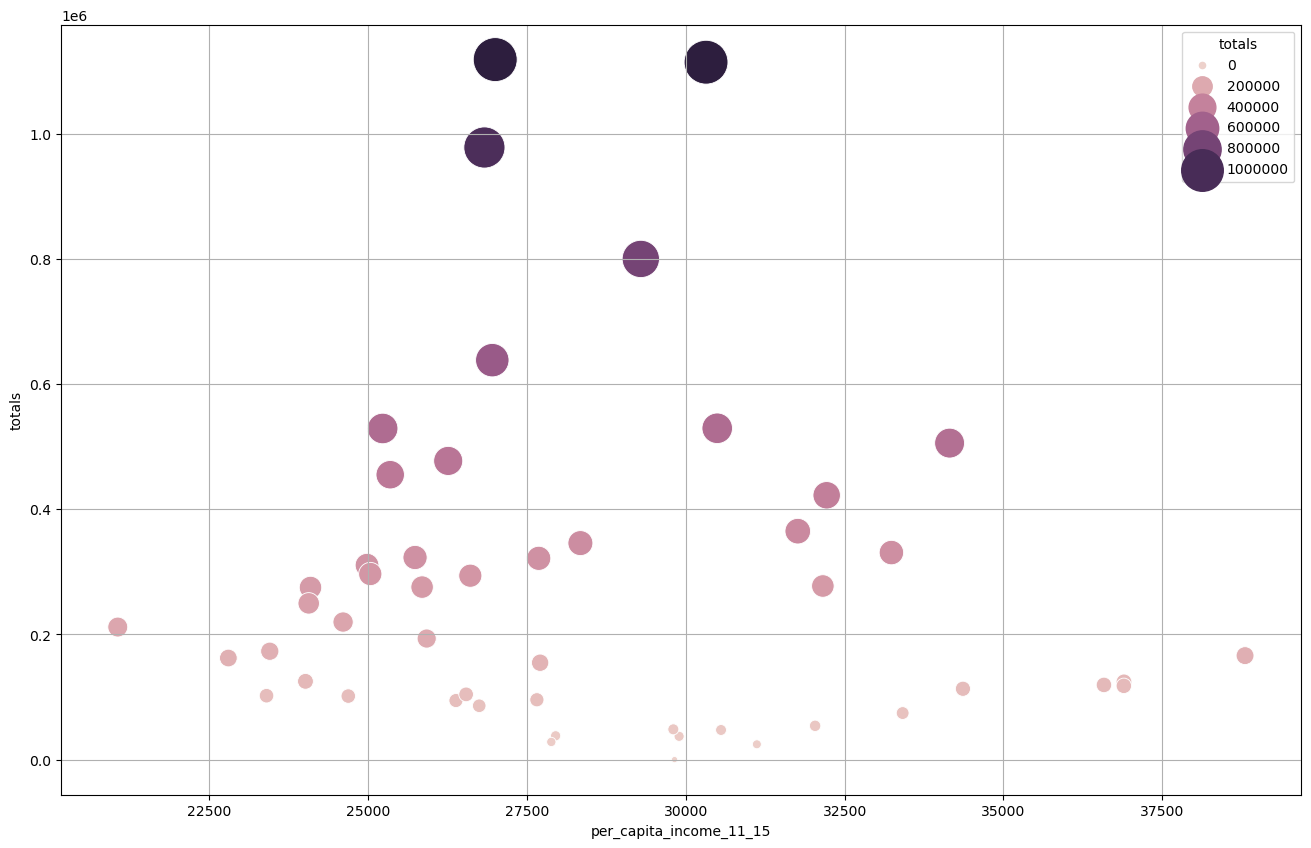

In [40]:
# Using seaborn, we plot a scatterplot and differentiate the markers using the total sale so that
# the states with bigger total sales will actually look bigger and darker in colour.
# Then we can tell the per_capita_income of these states

plt.figure(figsize=(16,10))
plt.grid(True)
plt.ylim()
sns.scatterplot(data=df_merged, x='per_capita_income_11_15', y='totals',
                size='totals', sizes=(20,1000), hue='totals')

>As can be infered from the scatter plot, higher per capita income doesn't necessarily mean more gun sales. The states with the most gun sales(bigger markers) ended up in the median per capital income range. 

### Research Question 3  
### (Are the veterans living in a state indicative of the guns purchases?)

>**For this question, it is best to plot the state against the total guns on the same bar as number of veterans.

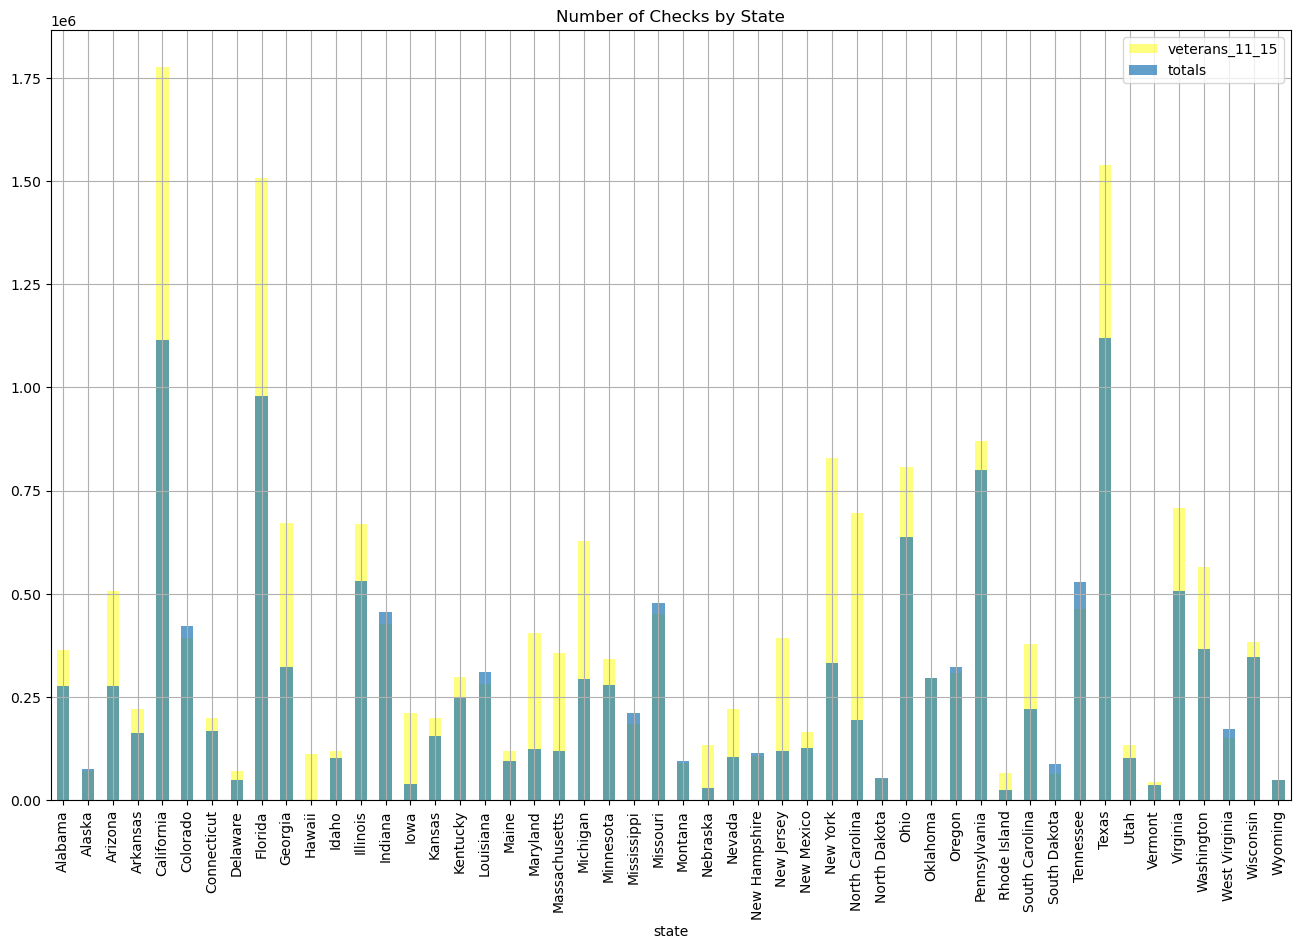

In [41]:
ax=df_merged.plot(x='state', y='veterans_11_15', kind='bar', title='Gun Sales  & Number of Veterans by State',
               figsize=(16,10), color ='yellow', alpha=0.5)
df_merged.plot(x='state', y='totals', kind='bar', title='Number of Checks by State', ax=ax, figsize=(16,10),alpha=0.7)
plt.grid(True)

>It cannot be stated emphatically that the veterans influence the gun sales in the states. This is because the bars are not largely similar among all states. Some states have more veterans than gun sale and more states have more veterans than gun sales. 

### Research Question 4  
### (What is the Race distribution in the States with highest Gun Purchases ?)

In [42]:
#Find state with the highest gun sale by sorting the values
top_gun_states=df_merged.sort_values(by=['totals'])

In [43]:
#Confirming the name of the state
top_gun_states

,state,handgun,long_gun,other,multiple,totals,population_estimates,white,black_or_african_american,native_american,asian,hawaiian_or_islanders,veterans_11_15,per_capita_income_11_15,gun_per_population
10,Hawaii,0,0,0,0,0,1428557,25.80,2.20,0.40,37.70,10.200,110238,29822.0,0.000000
38,Rhode Island,14262,10204,885,1999,24466,1056426,0.84,0.08,0.01,0.04,0.002,66076,31118.0,0.023159
26,Nebraska,1717,26494,260,82,28211,1907116,88.90,5.00,1.40,2.50,0.100,132918,27882.0,0.014792
44,Vermont,18320,18853,1291,885,37173,624594,94.60,1.30,0.40,1.80,NaN,44708,29894.0,0.059515
14,Iowa,2790,35254,393,70,38044,3134693,91.40,3.70,0.50,2.50,0.100,211066,27950.0,0.012136
7,Delaware,25574,21746,1268,1034,47320,952065,70.10,22.60,0.60,4.00,0.100,71213,30554.0,0.049702
49,Wyoming,22569,25815,1457,1295,48384,585501,92.80,1.30,2.70,1.00,0.100,48505,29803.0,0.082637
33,North Dakota,19975,34013,1284,972,53988,757952,0.88,0.03,0.06,0.02,0.001,51179,32035.0,0.071229
1,Alaska,37491,36887,2889,2316,74378,741894,66.10,3.80,15.20,6.30,1.300,69323,33413.0,0.100254
40,South Dakota,36520,49522,3134,2184,86042,865454,0.85,0.02,0.09,0.02,0.001,63742,26747.0,0.099418


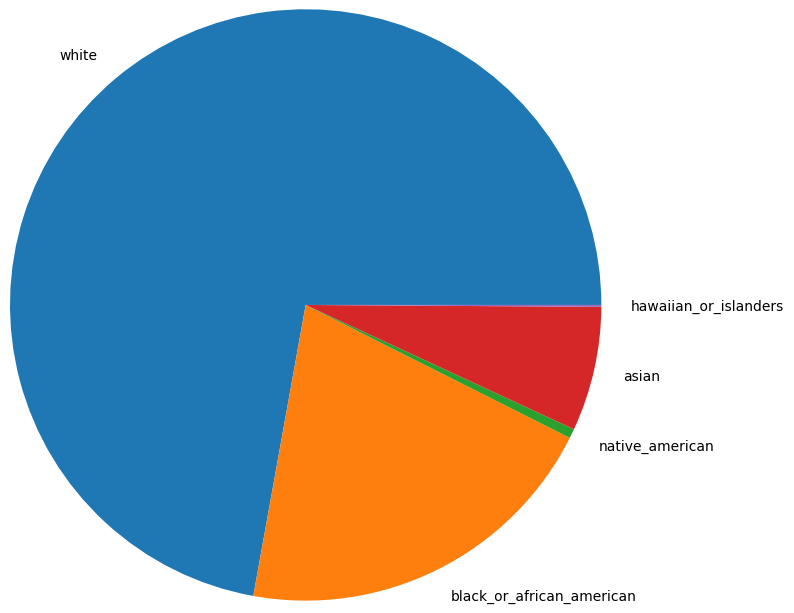

In [44]:
#Texas
texas_values=top_gun_states.iloc[42,7:12]
texas_labels=top_gun_states.columns[7:12]
plt.pie(texas_values, labels=texas_labels,radius=2)
plt.show()

>The pie chart reveals a large percentage of the population of Texas is white followed by black_or_african_american and then asian.

<a id='conclusions'></a>
## Conclusions

> The FBI Gun Data has bee analysed to answer four questions. This was done in conjunction with the US Census Data. At the end of the project, we have been able to find the trend in gun sales in the US and also gained insight on per capita income and the gun sale distribution. 

> No statistical inferences have been made to explain the answers to the questions. 

> One limitation of this project is the fact that a huge chunk of the data had to be dropped to be able to continue with the analysis successfully. A considerable part of the data was non-essential.
